In [6]:
import tensorflow as tf
from tensorflow import keras
print('tensorflow version:',tf.__version__)
print('keras version:',keras.__version__)

tensorflow version: 2.3.0
keras version: 2.4.0


# 시퀀셜 API를 사용하여 이미지 분류하기 만들기

## 케라스를 사용하여 데이터셋 적재하기

In [7]:
fashion_mnist= keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test,y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [20]:
print(X_train_full.shape,X_train_full.dtype,sep='\n')

# 이미 훈련 세트와 테스트 세트로 나누어져 있다.

(60000, 28, 28)
uint8


In [22]:
# 경사하강법으로 신경망을 훈련하기 때문에 입력 특성의 스케일을 조정해야 한다.
# 픽셀 강도를 255.0으로 나누어 0~1 사이 범위로 조정


X_valid,X_train = X_train_full[:5000]/255.0,X_train_full[5000:]/255.0 # 검증셋이 없기때문에 검증셋 만들기
y_valid,y_train = y_train_full[:5000],y_train_full[5000:]

x_test = X_test/255.0

In [24]:
# 레이블에 해당하는 아이템을 나타내기 위해 클래스 이름의 리스트 만들기

class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [25]:
len(class_names)

10

In [26]:
class_names[y_train[0]]

'Coat'

## 시퀀셜 API를 사용하여 모델 만들기

첫 번째 라인은 Sequential 모델을 만든다. 이 모델은 가장 간단한 케라스의 신경망 모델이다. 

순서대로 연결된 층을 일렬로 쌓아서 구성한다. 이를 시퀀셜 API라고 부른다.

In [29]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28])) # Flatten 층은 입력 이미지를 !D배열로 변환한다. 입력데이터를 받으면 X.reshape(-1,28*28)을 계산한다.
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [ ]:
# 내포하는 방식

# model = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=[28,28]),
#     keras.layers.Dense(300,activation='relu'),
#     keras.layers.Dense(300,activation='relu'),
#     keras.layers.Dense(300,activation='softmax)    
    
# ])

In [31]:
model.summary() # 모든 층 출력

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


## 모델 컴파일

모델을 만들고 나서 compile() 메서드를 호출하여 사용할 손실 함수와 옵티마이저를 지정해야 한다.

부가적으로 훈련과 평가 시에 계산할 지표를 추가로 지정할 수 있다.

In [33]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

### 지식
레이블이 정수 하나로 이루어져 있고(즉, 샘플마다 타깃 클래스 인덱스 하나가 있다.여기에서는 0~9까지 정수) 클래스가 배타적이므로
'sparse_categorical_crossentropy' 손실을 사용한다

만약 샘플마다 클래스별 타깃 확률을 가지고 있다면 (예를 들어 클래스 3의 경우[0.,0.,0.,1.,0.,0.,0.,0.,0.,0.]인 원핫벡터라면) 대신
'categorical_crossentropy' 손실을 사용해야 한다.

(이진 분류나 다중 레이블 이진 분류를 수행한다면 출력층에 'softmax' 함수 대신 'sigmoid'함수를 사용하고 'binary_crossentropy'손실을 사용한다.

### 지식2

옵티마이저에 'sgd'를 지정하면 기본 확률적 경사 하강법을 사용하여 모델을 훈련한다는 의미다.

다른 말로 하면 케라스가 앞서 소개한 역전파 알고리즘을 수행한다.

## 모델 훈련과 평가

In [35]:
history = model.fit(X_train, y_train, epochs=30, # epochs 설정안하면 기본값 1
                   validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.7407 - accuracy: 0.7565 - val_loss: 0.5051 - val_accuracy: 0.8292
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4864 - accuracy: 0.8308 - val_loss: 0.4575 - val_accuracy: 0.8462
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4410 - accuracy: 0.8464 - val_loss: 0.4078 - val_accuracy: 0.8644
Epoch 4/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4150 - accuracy: 0.8542 - val_loss: 0.4107 - val_accuracy: 0.8588
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3967 - accuracy: 0.8608 - val_loss: 0.3806 - val_accuracy: 0.8672
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3792 - accuracy: 0.8666 - val_loss: 0.3894 - val_accuracy: 0.8644
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3676 - accuracy: 0.8707 - val_loss: 0.3622 - val_accuracy:

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

## 학습곡선 (history.history)

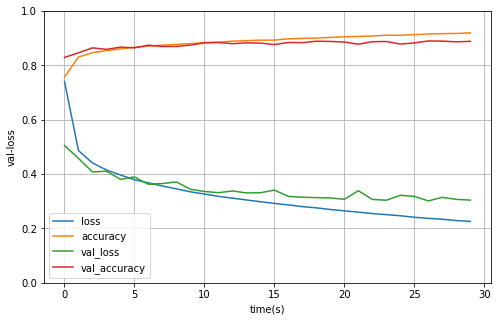

In [41]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # 수직축의 범위를 [0-1] 사이로 설정한다.
plt.ylabel('val-loss')
plt.xlabel('time(s)')
plt.show()

훈련손실은 에포크가 진행되는 동안 계산되고, 검증손실은 에포크가 끝난 후에 계산된다.

그러므로 훈련곡선은 에포크의 절반만큼 왼쪽으로 이동해야 한다.

일반적으로 충분히 오래 훈련하면 훈련 세트의 성능이 검증 세트의 성능을 앞지른다.

검증손실이 여전히 계속 감소한다면 모델이 아직 완전히 수렴되지 않았다고 볼 수 있다. -> 훈련을 계속해야 한다.

Keras 에서는 fit() 메서드를 다시 호출하면 중지되었던 곳에서부터 훈련을 이어갈 수 있다.

## 모델 평가

모델의 검증 정확도가 만족스럽다면,   
모델을 상용 환경으로 배포하기 전에 테스트 세트로 모델을 평가하여 일반화 오차를 추정

In [44]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 61.0926 - accuracy: 0.8517


[61.09258270263672, 0.8517000079154968]

검증 세트보다 테스트 세트에서 성능이 조금 낮은 것이 일반적이다.    
하이퍼 파라미터를 튜닝한 곳이 테스트 세트가 아니라 검증 세트이기 때문. 테스트 세트에서는 하이퍼파라미터 조정 X, 일반화 오차를 낙관적으로 추정하게 됌

## 모델을 사용해 예측을 만들기

모델의 predict() 메서드를 사용해 새로운 샘플에 대해 예측을 만들 수 있다.

In [48]:
X_new =X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

### 가장 높은 확률만 가진 클래스 찾기

In [50]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1], dtype=int64)

In [52]:
import numpy as np
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')